<a href="https://colab.research.google.com/github/YagyanshB/pandas/blob/main/unemployment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Describing the plotting sizes and colours that would be used

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
# Installing the Fred API

!pip install fredapi > /dev/null 2>&1

In [10]:
from fredapi import Fred
fred_key = '*******************' # Please insert your own API key

# Creating a Fred Object

In [11]:
fred = Fred(api_key = fred_key)

In [12]:
fred

# Searching for Economic Data

In [20]:
# Inspecting the Fred API to gather data related to the S&P index

sp_search = fred.search('S&P', order_by = 'popularity')

In [18]:
sp_search.shape

(1000, 15)

In [22]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-12-31,2024-12-31,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-12-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-30 08:37:09-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-12-31,2024-12-31,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-11-26 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-12-31,2024-12-31,S&P 500,2014-12-31,2024-12-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-12-30 19:12:09-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-12-31,2024-12-31,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-12-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-30 08:37:12-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-12-31,2024-12-31,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-12-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-30 08:45:01-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


# Pull Raw Data & Plot

In [25]:
sp_500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P 500 Index'}>

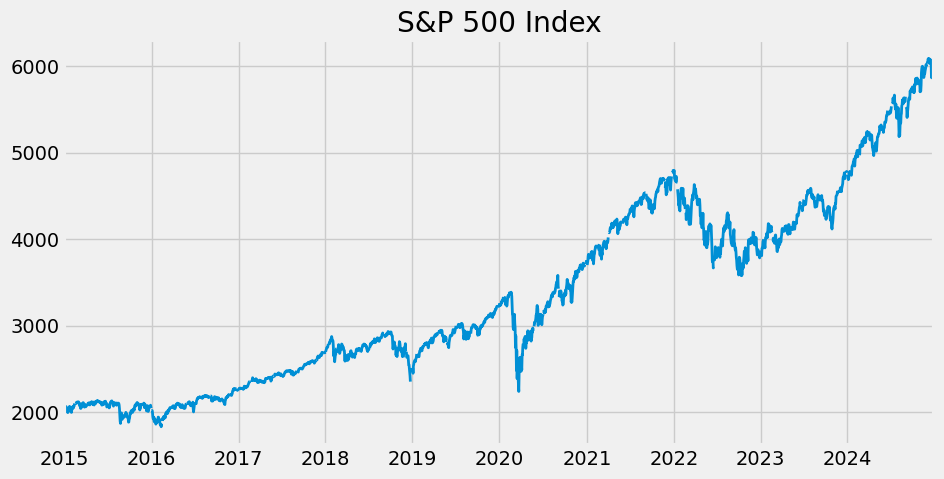

In [29]:
sp_500.plot(figsize = (10,5), title = 'S&P 500 Index', lw = 2)

# Pull & Join Multiple Data Series

In [30]:
uemp_results = fred.search('unemployment', order_by = 'popularity')

In [31]:
uemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2024-12-31,2024-12-31,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2024-11-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-12-11 07:41:02-06:00,95,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2024-12-31,2024-12-31,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,95,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2024-12-31,2024-12-31,"All Employees, Total Nonfarm",1939-01-01,2024-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-12-06 07:48:01-06:00,83,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2024-12-31,2024-12-31,Initial Claims,1967-01-07,2024-12-21,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-12-26 07:33:01-06:00,81,An initial claim is a claim filed by an unempl...
SAHMREALTIME,SAHMREALTIME,2024-12-31,2024-12-31,Real-time Sahm Rule Recession Indicator,1959-12-01,2024-11-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2024-12-06 07:58:01-06:00,80,Sahm Recession Indicator signals the start of ...


In [32]:
uemp = fred.get_series(series_id = 'UNRATE')

<Axes: title={'center': 'Unemployment Rate Over The Years'}>

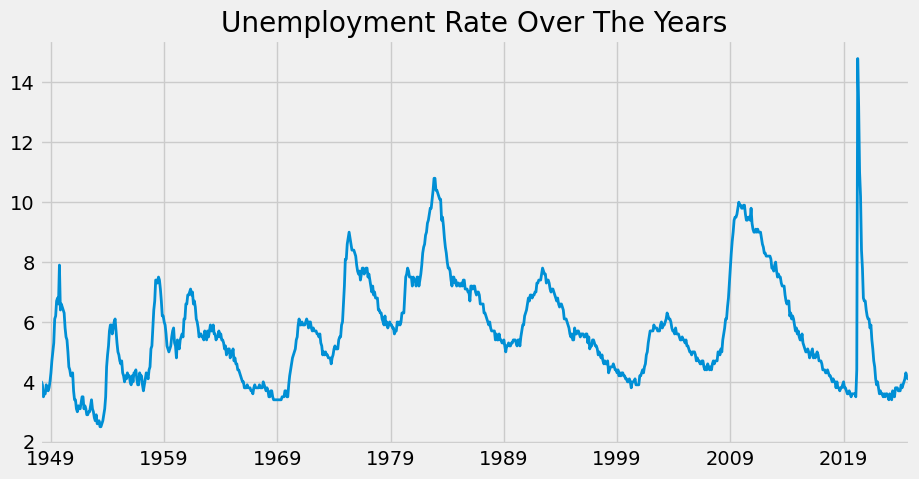

In [36]:
uemp.plot(figsize=(10,5), title = 'Unemployment Rate Over The Years', lw = 2)

In [35]:
uemp

,0
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-07-01,4.3
2024-08-01,4.2
2024-09-01,4.1
2024-10-01,4.1


In [55]:
# Searching unemployment rate by state


# This is our unemployment rate by state dataframe

unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))

In [56]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [60]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [62]:
unemp_df.shape

(98, 15)

In [71]:
all_results = []


for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name = myid)
  all_results.append(results)

In [72]:
type(all_results)

list

In [82]:
all_results[97]

,LNS14000150
1955-01-01,3.3
1955-02-01,3.2
1955-03-01,3.2
1955-04-01,3.3
1955-05-01,2.7
...,...
2024-07-01,2.1
2024-08-01,2.1
2024-09-01,2.1
2024-10-01,2.3


In [90]:
uemp_results = pd.concat(all_results, axis = 1).drop(['LNS14000006', 'M0892AUSM156SNBR', 'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'LNS14000061', 'LRUNTTTTUSM156S', 'LNS14000026', 'LNS14000048', 'LNS14000089', 'M08311USM156SNBR', 'LNS14000150'], axis = 1)

In [96]:
uemp_state = uemp_results.drop('UNRATE', axis = 1)

<Axes: >

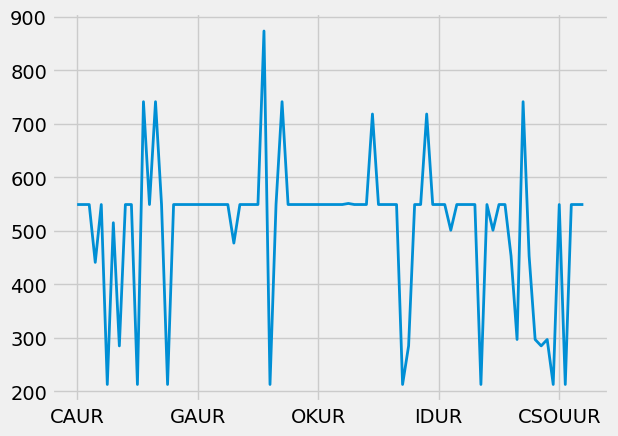

In [100]:
uemp_state.isna().sum().plot(lw = 2)

In [102]:
uemp_states = uemp_state.dropna()

In [116]:
# Plot States Unemployment Rate

px.line(uemp_states, title = 'Unemployment Rate Over The Years')

# Pull April 2020 Unemployment Rate Per State

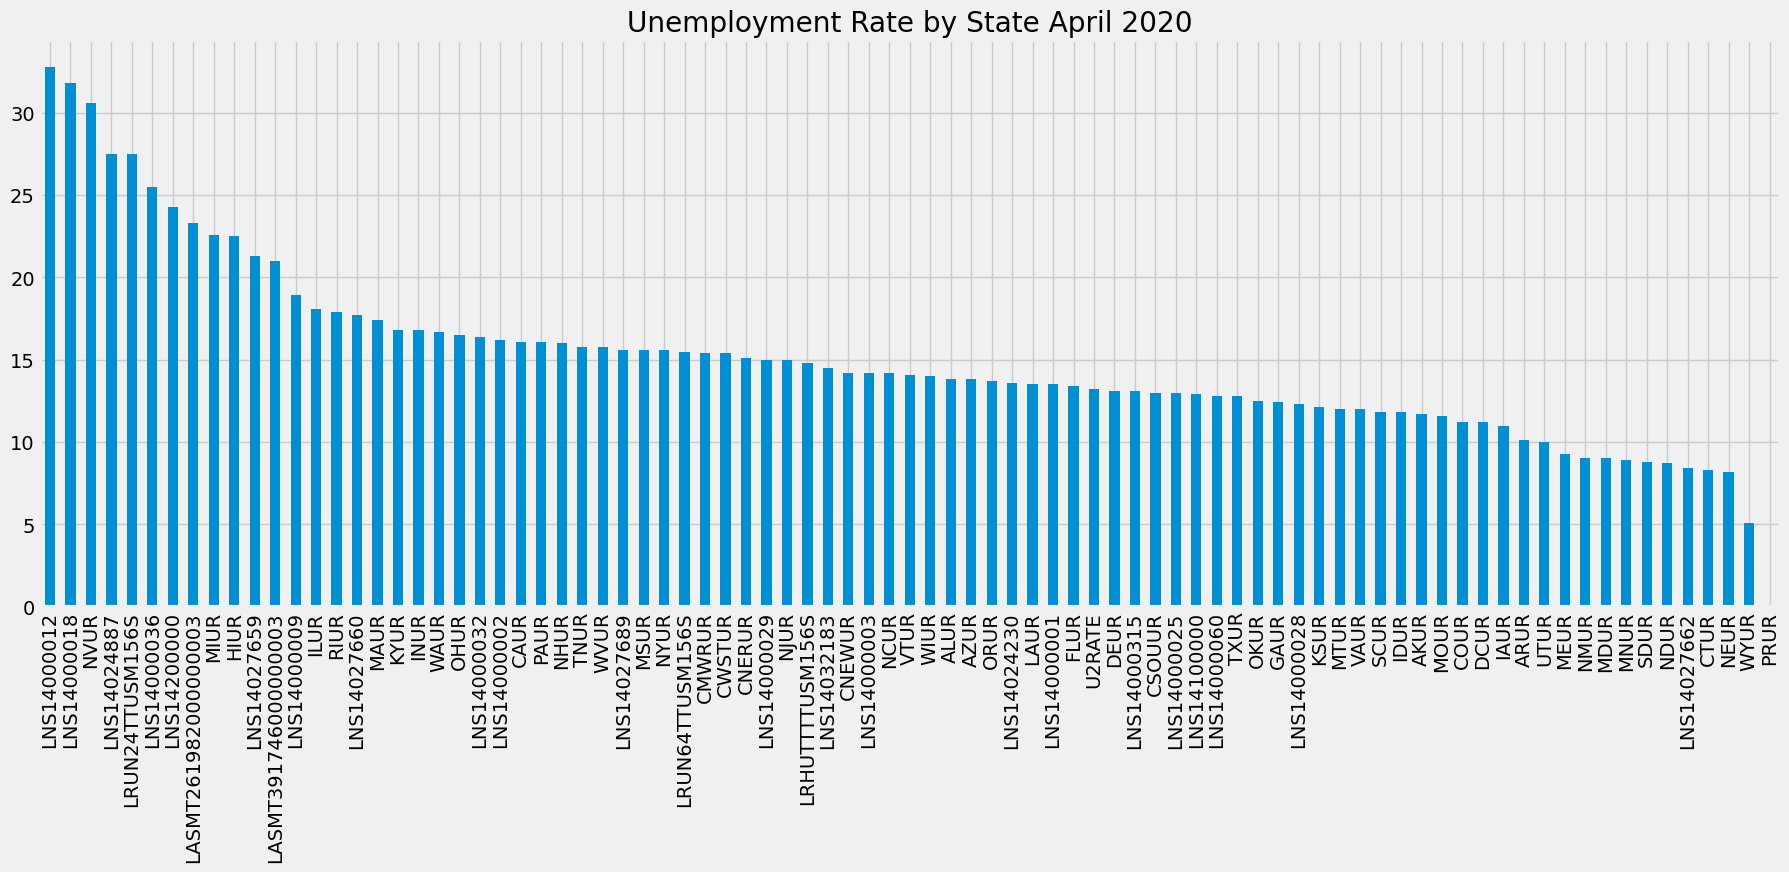

In [140]:
ax = uemp_state.loc[uemp_state.index == '2020-04-01'].T.sort_values(by = '2020-04-01', ascending = False).plot(kind = 'bar', figsize = (20,7), title = 'Unemployment Rate by State April 2020')
ax.legend().remove()
plt.show()

In [135]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()

In [137]:
uemp_states.columns = uemp_states.columns.map(id_to_state)

In [139]:
uemp_states.columns

Index([' California', ' Texas', ' New York', ' Florida', ' Pennsylvania',
       ' Ohio', ' Michigan', ' Alabama', ' Massachusetts', ' North Carolina',
       ' Illinois', ' New Jersey', ' Georgia', ' Colorado', ' Arizona',
       ' Wisconsin', ' Virginia', ' Kentucky',
       'Infra-Annual Labor Statistics: Unemployment Rate Total: From 15 to 64 Years for United States',
       ' South Carolina', ' New Mexico', ' Minnesota', ' Tennessee',
       'Unemployment Rate - Asian', ' Washington',
       'Unemployment Rate - Less Than a High School Diploma, 25 Yrs. & over',
       ' Maryland', ' Oregon', ' West Virginia', ' Nevada', ' Arkansas',
       ' Oklahoma', ' Missouri', ' Alaska', ' Iowa', ' Utah', ' Puerto Rico',
       ' Indiana', ' Louisiana', ' Hawaii',
       ' Detroit-Warren-Dearborn, MI (MSA)', ' North Dakota', ' Montana',
       ' the District of Columbia', ' Mississippi',
       'Unemployment Rate - 25-54 Yrs.',
       'Unemployment Rate - 20 Yrs. & over, White Men', ' Maine',